In [1]:
# Torch
import torch
import torch.optim as optim
from torcheval.metrics import *

# Benny pointnet
from pointnet2_benny import pointnet2_cls_msg

# Custom modules
from preprocessing_post_fastsurfer.subject import *
from preprocessing_post_fastsurfer.vis import *
from ozzy_torch_utils.split_dataset import *
from ozzy_torch_utils.SubjectDataset import *
from ozzy_torch_utils.plot import *
from ozzy_torch_utils.train_nn import *
from ozzy_torch_utils.model_parameters import *
from ozzy_torch_utils.init_dataloaders import *

### Hyperparameters

In [2]:

model_parameters = ModelParameters()

model_parameters.data_path = "/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/scratch-disk/full-datasets/adni1-complete-3T-processed"

model_parameters.selected_labels = ['CN', 'MCI']

# Dictionary key representing the data of interest
model_parameters.data_string = 'hcampus_pointcloud'

# Dictionary key representing the disease labels
model_parameters.labels_string = 'research_group'

# Prevent class imbalance
model_parameters.downsample_majority = True

# NB this argument makes prevent_id_leakage redundant
model_parameters.single_img_per_subject = False

# Prevent the same subject id from occuring in train and test, in case of more than one image per id
model_parameters.prevent_id_leakage = True

# NB batch size must divide dataset nicely
model_parameters.batch_size = 20

model_parameters.test_size = 0.3

model_parameters.num_epochs = 10

model_parameters.learning_rate = 0.001

model_parameters.threshold = 0.5

model_parameters.model = pointnet2_cls_msg.get_model(len(model_parameters.selected_labels), normal_channel=False)

model_parameters.criterion = pointnet2_cls_msg.get_loss()

model_parameters.optimiser = optim.Adam(
                                model_parameters.model.parameters(),
                                lr=model_parameters.learning_rate,
                                betas=(0.9, 0.999),
                                eps=1e-08,
                                weight_decay=1e-4,
                                amsgrad=True
                            )

### Dataloader creation

In [3]:
train_dataloader, test_dataloader = init_dataloaders(model_parameters, verify_data=True)

Dataset size: 320

Unique labels: (array([0, 1]), array([160, 160]))

Unique ids: (array(['002_S_0413', '002_S_0559', '002_S_0954', '002_S_1070',
       '002_S_1261', '002_S_1268', '002_S_1280', '005_S_0324',
       '005_S_0448', '005_S_0553', '005_S_0572', '005_S_0602',
       '007_S_1206', '007_S_1222', '012_S_1009', '012_S_1292',
       '012_S_1321', '016_S_0769', '016_S_1117', '016_S_1121',
       '016_S_1326', '018_S_0369', '018_S_0406', '018_S_0425',
       '018_S_0450', '021_S_0332', '023_S_0030', '023_S_0031',
       '023_S_0058', '023_S_0061', '023_S_0078', '023_S_0331',
       '023_S_0376', '023_S_0388', '023_S_0604', '023_S_0625',
       '023_S_0855', '023_S_0926', '023_S_0963', '023_S_1046',
       '023_S_1126', '023_S_1190', '023_S_1247', '027_S_0307',
       '027_S_0403', '027_S_0417', '027_S_0835', '027_S_1277',
       '027_S_1387', '031_S_0830', '031_S_1066', '032_S_0677',
       '032_S_1169', '037_S_0303', '037_S_0501', '037_S_1225',
       '051_S_1072', '051_S_1123', 

### Training

In [4]:
metrics = train_nn(model_parameters, train_dataloader, test_dataloader)

Using cuda device
Starting epoch 1



100%|██████████| 11/11 [00:07<00:00,  1.44it/s]


tensor([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])


/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Epoch 1 complete

------------------------
tensor([[ 3., 50.],
        [ 1., 26.]])
Training Loss:   16.2090
Validation Loss: 14.5200
Accuracy:        0.3625
F1 Score:        0.5049
Precision:       0.3421
Recall:          0.9630
ROC AUC:         nan
------------------------


Starting epoch 2



100%|██████████| 11/11 [00:07<00:00,  1.54it/s]


tensor([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])


/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Epoch 2 complete

------------------------
tensor([[30., 23.],
        [14., 13.]])
Training Loss:   14.3509
Validation Loss: 14.8493
Accuracy:        0.5375
F1 Score:        0.4127
Precision:       0.3611
Recall:          0.4815
ROC AUC:         nan
------------------------


Starting epoch 3



100%|██████████| 11/11 [00:07<00:00,  1.54it/s]


tensor([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])


/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Epoch 3 complete

------------------------
tensor([[27., 26.],
        [12., 15.]])
Training Loss:   13.9430
Validation Loss: 15.4289
Accuracy:        0.5250
F1 Score:        0.4412
Precision:       0.3659
Recall:          0.5556
ROC AUC:         nan
------------------------


Starting epoch 4



 91%|█████████ | 10/11 [00:06<00:00,  1.46it/s]


KeyboardInterrupt: 

### Plotting

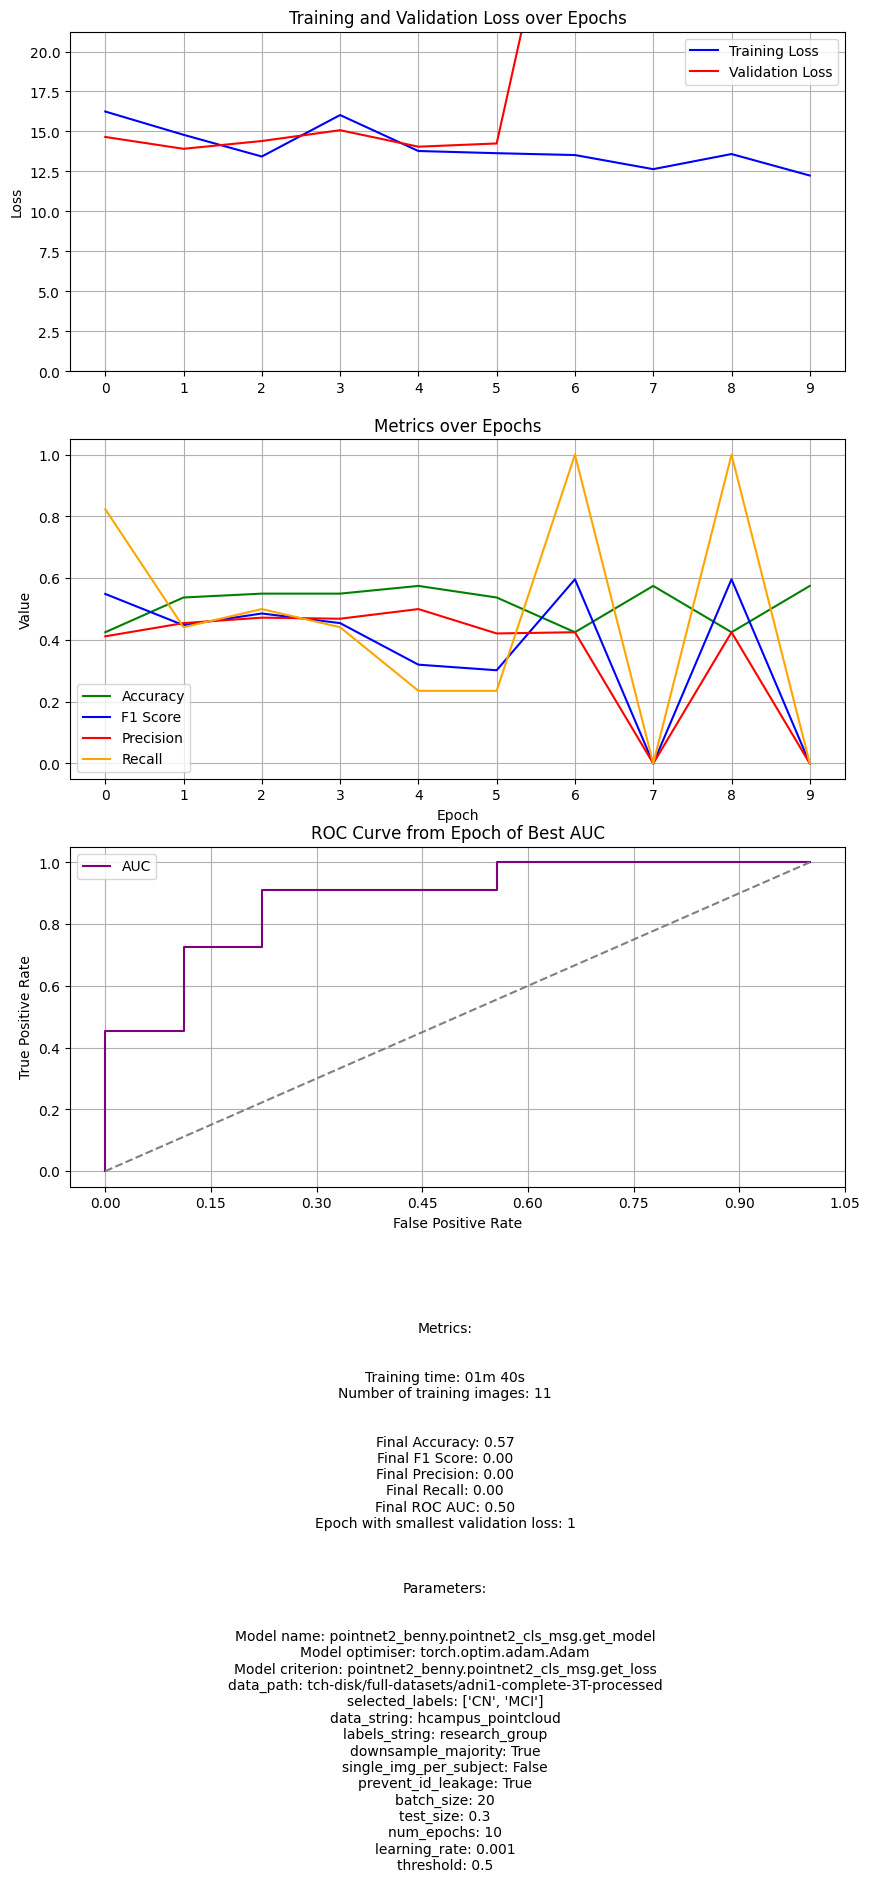

In [5]:

plot(metrics, model_parameters)
